#### Tensor flow installed by using the following commands
1. pip install tensorflow   this displays some error
2. conda update --all
pip install --upgrade tensorflow==2.0.0-beta1

### How to check the verion of the tensorflow?

In [1]:
import tensorflow as tf
tf.__version__



/home/bishnu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bishnu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bishnu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bishnu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

'2.0.0-beta1'

## perceptron model

#### To begin understand the deep learning we will build up our model abstractions:
1. single biological neuron
2. perceptron
3. multi-layer perceptron model
4. Deep learning Neural network

#### As we learn about the more complex models, we will introduce concepts such as
1. Activation function
2. Gradient Descent
3. BackPropagation

#### Lets focus on building out that single perceptron model based of a real biological neuron. 
If the whole idea behind the deep learning is to have computers artificially mimic biological nural intelligence, we should probably build a general understanding of how biological neurons work

## Neural network

### Activation Functions

## Multi-Lcass Classification Considerations

### Cost Functions and gradient Decents

## BackPropaation

## Tensorflow vs keras

## TF syntax basics part 1 preparing data

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns

In [5]:
df=pd.read_csv('fake_reg.csv') # downloaded this csv file from git hub.
# copied the data and then pasted in my file

In [6]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


#### We are going to treat it as a regressinn problem
where bssed off feature1 and feature2 will attempt to predict the price

The main goal is to build the model  that  when we pick a new Gemstone from the ground we can measure its features. Feature1  and feature2 and predict what price we should be selling this at the market due to the fact we have the historical information on the price sold based off these two features.

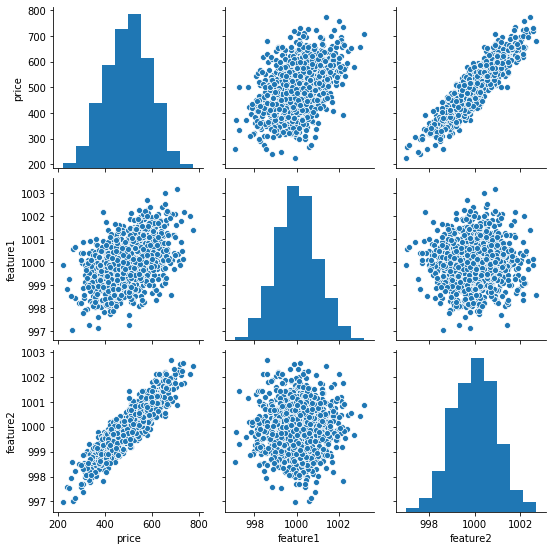

In [7]:
sns.pairplot(df)

#### Once you have explore the data the next  step is tp create a test train split and we can do this  from scikit leran.

In [8]:
from sklearn.model_selection import train_test_split

### we are going to split our data in to a training set and that of the test set

#### We will train on the training set and then evlauate our models performance on the test set

#### First we want to  grab  the  features that we are going to use

#### Because of the way tensorflow works we have  to actually pass in num pi arrays instead of pandas data frames or pandas series. So I can simply add .values at the end of series or data frame and I will  return it back as numpi array

In [9]:
X = df[['feature1','feature2']].values
# two D vector so that the X is upper case

In [10]:
y=df['price'].values
# only one Dimensional there fore the y is lowercase

##### So now we have actual numpy arrays

In [13]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### When we do a train test split we both split our features into X train next test as well as our labels into y train and  y test 

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

#### this means  70 % for the train set and that of 30 % for test set because original data size is 1000 rows

##### Now the next step is to normalize of scale your data because we are working with weights and biases inside of the neural network

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


#### Now lets see how to scale the data

##### To use a scaler with the scikit learn what we do is first we create an instance of it

In [16]:
scaler= MinMaxScaler()

###### Now the scaler need to be fitted on the the training data. If we say fit on the X train what is does is it simply calculates the parameters it needs to perform the actual scalling later on

In [17]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

###### So the fit calculates the standard deviation for the min and max

In [18]:
X_train = scaler.transform(X_train)

##### This actually performs the transformation. And we will do the same for the tezt set

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train # now they should be scaled

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [21]:
X_train.max()

1.0

In [22]:
X_train.min()

0.0

##### Looks everything has been scaled between 0 and 1

#### Now that we scaled the data it's time ttworko actually show how to create your own neural network.

## Part 2

#### We will begin to create our neural network in this part

##### In this part we will focus on creating the model, running the model and then generating predictions from the model

##### Up to now we visualize the data that is the pair plot and we have scaled our featured data

In [23]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

In [24]:
help(Sequential) # very nice documentation
# cal also do help(Dense)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

#### There are two ways to ways of creating a character based model

#### One way is to call sequential and then passing a lsit of the actual layers you want

In [26]:
model=Sequential([Dense(4,activation='relu')])

#### This means if something densely connected its going to  be a normal feed forward network where every neuron is connected to every other neuron in the nex  layer

##### put a cursor inside 'Dense()' the parenthesis and hit shift and tab. You will see units which means  just another  for neurons. Essentially how many neurons are going to be in this layer and then activaation takes  a string call for what activation function these neurons should be using should they be using  a sigmoid activation, they rectified a linear unit criteria.

##### So now lets see how to build out a network

###### lets imagine my first layer to be the 4 neurons densely connected. Meaning evry neuron is connected to every other neuron and we can say my activation and I could say somethig like  relu. which stands for the stands for the rectified linear unit.


##### If I would like to add another layeer, I would simply keep passing these into my list so may be I want  the next layer have two neurons and  another activation functional rectified linear unit. I could pass in strings like sigmoid etc and you can check out the online documentation for the  various string calls for the different activation functions.

##### Lets imaginne I want one final output layer with one unit. I would say Dense(1). Again, I could play around the  activation function there. 

##### But this is just one way we could just build the model

In [27]:
model=Sequential([Dense(4,activation='relu'),Dense(2,activation='relu'),Dense(1)])
#1

## The other way we can do this

###### create  an empty sequential model and then off that model  variable you add the layers and in separately one at time so you would  say activation rectified linear unit and then copy and then aste this command as such then kind of play sround the values there.

In [28]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))
#2

##### Here above two cells that is # 1 and that of the #2 are producing the same model

###### The maon diffrrence is the convenience fpr the #2

##### Now lets lets do that here . We will have the 3 layers with 4   neurons each using a rectified  linear unit and the vary lat layer will be the one fial unit.The final output layer is very important and that is gonna be  determined by your actual situation of what you are going to predict. Recall that in this particular data set we are going to  predict a single price value. SO what I want is my last layer is single neuron that produces some sort of price. So it is going to predict  maybe 450 $ or 600$ . That why I am choosing the fian; Dense  layer to be 1. Where it just going to predict the price. so that the  fianl output is then going to be measured against the true price. And we will do that some sort of  lost function and thats where this final line comes into play which is compiling your maodel.

In [29]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse') # check inside the complile parenthesis by using the shift and tab  keys
#  note the optimizer and the loss are the important parameters

##### NOw we have a full model ready to go. That means we are ready to train the model or  fit the model to the training data and we can do this by saying models.

In [30]:
model.fit(x=X_train,y=y_train,epochs = 250) # can find the fit parameter by presing the shift and the tab key insdie the parenthesis
# epoch means you have gone through the entire dataset one time

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256746.4855
Epoch 2/250
700/700 [==============================] - 0s 48us/sample - loss: 256691.1087
Epoch 3/250
700/700 [==============================] - 0s 58us/sample - loss: 256667.6119
Epoch 4/250
700/700 [==============================] - 0s 49us/sample - loss: 256645.6305
Epoch 5/250
700/700 [==============================] - 0s 56us/sample - loss: 256623.6854
Epoch 6/250
700/700 [==============================] - 0s 50us/sample - loss: 256601.8329
Epoch 7/250
700/700 [==============================] - 0s 55us/sample - loss: 256579.9843
Epoch 8/250
700/700 [==============================] - 0s 47us/sample - loss: 256558.0472
Epoch 9/250
700/700 [==============================] - 0s 53us/sample - loss: 256536.1437
Epoch 10/250
700/700 [==============================] - 0s 64us/sample - loss: 256514.2796
Epoch 11/250
700/700 [==============================] - 0s 50us/sample - loss: 

700/700 [==============================] - 0s 53us/sample - loss: 254766.4569
Epoch 91/250
700/700 [==============================] - 0s 55us/sample - loss: 254744.6443
Epoch 92/250
700/700 [==============================] - 0s 48us/sample - loss: 254722.8291
Epoch 93/250
700/700 [==============================] - 0s 44us/sample - loss: 254701.0601
Epoch 94/250
700/700 [==============================] - 0s 50us/sample - loss: 254679.2602
Epoch 95/250
700/700 [==============================] - 0s 48us/sample - loss: 254657.4482
Epoch 96/250
700/700 [==============================] - 0s 58us/sample - loss: 254635.6554
Epoch 97/250
700/700 [==============================] - 0s 55us/sample - loss: 254613.8853
Epoch 98/250
700/700 [==============================] - 0s 51us/sample - loss: 254592.1223
Epoch 99/250
700/700 [==============================] - 0s 57us/sample - loss: 254570.3228
Epoch 100/250
700/700 [==============================] - 0s 45us/sample - loss: 254548.4442
Epoch 101/2

700/700 [==============================] - 0s 41us/sample - loss: 252829.2448
Epoch 180/250
700/700 [==============================] - 0s 46us/sample - loss: 252807.5308
Epoch 181/250
700/700 [==============================] - 0s 46us/sample - loss: 252785.8289
Epoch 182/250
700/700 [==============================] - 0s 59us/sample - loss: 252764.1116
Epoch 183/250
700/700 [==============================] - 0s 47us/sample - loss: 252742.3613
Epoch 184/250
700/700 [==============================] - 0s 52us/sample - loss: 252720.7102
Epoch 185/250
700/700 [==============================] - 0s 45us/sample - loss: 252698.9519
Epoch 186/250
700/700 [==============================] - 0s 43us/sample - loss: 252677.2524
Epoch 187/250
700/700 [==============================] - 0s 49us/sample - loss: 252655.5695
Epoch 188/250
700/700 [==============================] - 0s 48us/sample - loss: 252633.8371
Epoch 189/250
700/700 [==============================] - 0s 58us/sample - loss: 252612.0665
Ep

###### This is a small data set and we efinished our training. You should also note that our mean square error is very large at the beginning which is 256115.6285 at the beginning. But it it begins to adjust these weights and biases, scroll down and you will notice the the loss is slowly decreasing and should decrease very quickly at first nad then kind of slowly as it goes fyrther until towards the end. it should begin adjusting to some sort of mean squared value, so we can go ahead and see this by plotting it out.

In [50]:
 model.history.history

{'loss': [256474.41267857142,
  256295.41383928573,
  256117.9035714286,
  255936.04107142857,
  255748.1113392857,
  255547.85785714287,
  255332.48205357144,
  255100.91455357143,
  254855.42482142858,
  254598.22169642858,
  254324.895,
  254034.16383928573,
  253721.426875,
  253389.75151785713,
  253033.4330357143,
  252651.80107142858,
  252248.40982142856,
  251818.47973214285,
  251363.10571428572,
  250878.9213392857,
  250362.41928571428,
  249821.49633928572,
  249247.22339285715,
  248644.71223214286,
  248001.59660714286,
  247327.52732142858,
  246618.46982142856,
  245874.1007142857,
  245089.39875,
  244265.45223214285,
  243402.0725892857,
  242497.52276785715,
  241552.4035714286,
  240559.9275892857,
  239524.60446428572,
  238440.29151785714,
  237311.71660714285,
  236136.68330357142,
  234906.15267857144,
  233628.69366071429,
  232306.69008928572,
  230928.10410714286,
  229492.43919642858,
  228000.02544642857,
  226454.48080357144,
  224854.58446428573,
  22319

##### This  returned the corresponding loss of the history which means  I can pass this to a data frame and  will get the nice dataframe.

In [31]:
loss_df= pd.DataFrame(model.history.history)

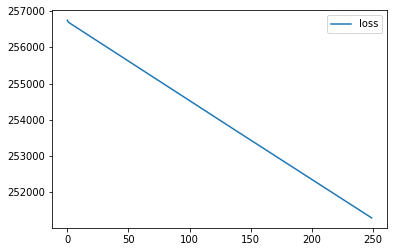

In [32]:
loss_df.plot()

###### This is very typical of the neural network training. Youu start from very high loss during your first couple of  epoch runs  and then as the weights  and biases get adjusted you hopefully see kind of  a steady but steep decline in your loss of your error anrovemrnt in your performanced eventually it will label off ehere you are not really doing  any sort of  impprovement in your performance  a s you train more and more. And later on we will be  able to  compare this to our validation loss to actually  check for things like overfitting.
So just finished how to train a model and how to fit a model. And we are going to deep to evluate against a brand new data point


# Part 3

###### How well the the model is perform that it is never seen before and the data was our test data. There are lot s different ways we can evluate. So we  are going to walk through  a bunch of different methods and a lot of  these will return      back the  same result. one way to do this  is 

In [33]:
model.evaluate(X_test,y_test,verbose=0)
# it will return the looss of the X_test and that of the y_test

253688.07666666666

###### The number should be smaller. But it looks very high. In the lecture it is 24 about. If we take a look at our model, it is mean square error . What that means is on the test set that is the data that is never seen before, its geeting back the mean square error of  54738.67375

###### We can do same thing for our training set so we could say model that evluates X train versus y train, then we see the training loss.

In [34]:
model.evaluate(X_train,y_train,verbose=0)

251277.97982142857

###### Again the value is (42.747023184640064) is larger than lecture

###### LEts se how to grab the root mean square error Nd mean absolute error. So the way we can do that is the get our actual true predictions and we do that by saying models that predict

In [37]:
test_predictions = model.predict(X_test)

###### What this does is the we pass in our test features and  have the model predict just based offf thos e features . So there will be the list of prices the are predicted off our  X test set. 

In [38]:
test_predictions

array([[5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],


###### And in fact lets bring these together along with  the true values for that test set. tha  is the y test and then we can plot them out compare them against each other.

###### So I will create a data frame called pred_df so my predictions data frame and its going to be equal and in this case I will say that my test predictions are this ... I will pass them in to the pandas series.

In [40]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [39]:
test_predictions

array([[5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],
       [5.5056043],


In [41]:
pred_df = pd.DataFrame(y_test,columns =['Test True Y'])

###### Right now my prediction data frame just has the true value of Y and what  I am going to deo is say  go ahead and concatenate that with the true value of y coma with my test predictions.

In [42]:
pred_df = pd.concat([pred_df,test_predictions],axis=0)

In [43]:
pred_df

,Test True Y,0
0,402.296319,NaN
1,624.156198,NaN
2,582.455066,NaN
3,578.588606,NaN
4,371.224104,NaN
...,...,...
295,NaN,5.505604
296,NaN,5.505604
297,NaN,5.505604
298,NaN,5.505604


In [44]:
pred_df.columns = ['Test True Y','Model Predictions']

In [45]:
pred_df

,Test True Y,Model Predictions
0,402.296319,NaN
1,624.156198,NaN
2,582.455066,NaN
3,578.588606,NaN
4,371.224104,NaN
...,...,...
295,NaN,5.505604
296,NaN,5.505604
297,NaN,5.505604
298,NaN,5.505604


###### Now can plot a scatter plot however, for some reason there are NAN values which I do not understand

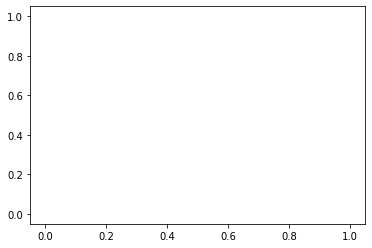

In [46]:
sns.scatterplot(x='Test True Y',y='Model Predictions', data = pred_df)

##### Should have aperfect correlation

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

###### Here, I got the error, however, the lecture shows it is 4 that means we are off by 4 dollar or some thing like that.

In [49]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [50]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


###### It is seen that the average price is 500 dollars, maximum of 774. and we are off by 4  $ in average 

In [51]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

###### will have the similar error like before

###### Finally we want to go over two last things which is predicting two brand new data. Lets imagine that we go out in to the field and I pick up out this gemstone from the ground and it has these feature.

In [52]:
new_gem = [[998,1000]]

###### model is trained on the scaled feature, first take the original scaler and transform new gem

In [53]:
new_gem= scaler.transform(new_gem)

In [54]:
model.predict(new_gem)

array([[5.5056043]], dtype=float32)

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save('my_gem_model.h5')

In [57]:
later_model= load_model('my_gem_model.h5')

W1011 22:55:17.481439 140144463685440 hdf5_format.py:197] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [58]:
later_model.predict(new_gem)

array([[5.5056043]], dtype=float32)

# Keras Regression Code -Part1

#### We are going to codingon the regression base project where based off the data set for different housing features we are going to try to predict price that a house should shell it.

Based on the information like no of bathrooms, bedrooms square foot etc we will try to predict.

##### So a big part of this is exploratory data analysis as well as  feature engineering which is what are going to focus on part 1.

##### The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('./DATA/kc_house_data.csv')

In [61]:
df.head() # the Id does not make any sense

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###### Fierst of all, lets see the data for the missing data, What the following command does is . it will treat missing as 1 and non missing as 0

In [62]:
df.isnull()#.sum()
# If something is missing it will return back True and True corresponds 1 which is a missing value

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df.isnull().sum() # it will treat False as zero which means not 
# missing value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [64]:
df.describe().transpose() # to see the mean , average std and so on

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


###### It will be hard to understand the data as it is complesx. lets visualize the data 

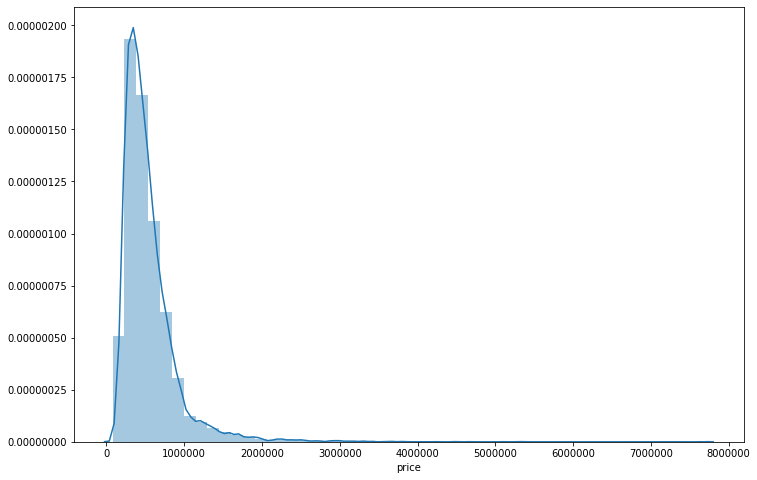

In [65]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

###### The distribution shows that most of the houses are falling between 0 and 1.5 million dollars

###### we can go ahead and the similar analysis for differet features for example, for the categorical ones such as number of bedrooms which is kind of continuous but you can't  have like 1.5 bedrooms. So we can treat this as count plot.

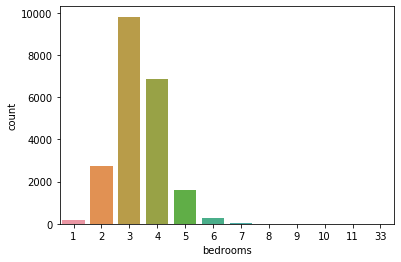

In [66]:
sns.countplot(df['bedrooms'])

In [67]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [68]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

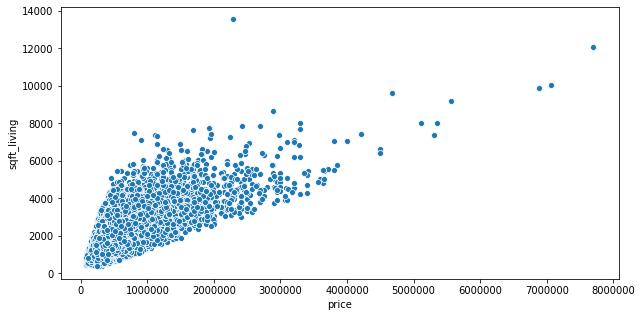

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

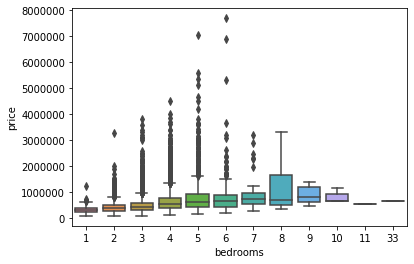

In [70]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [71]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

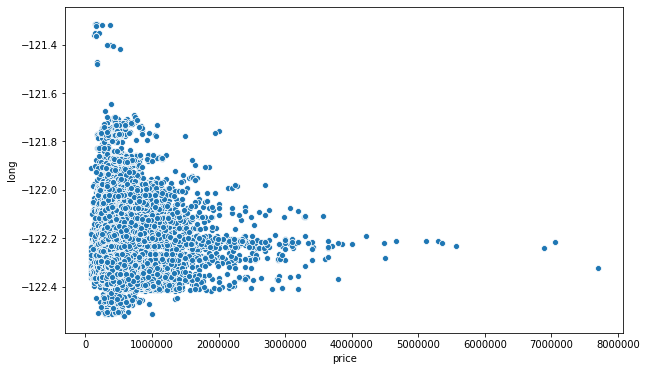

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df) # longitude

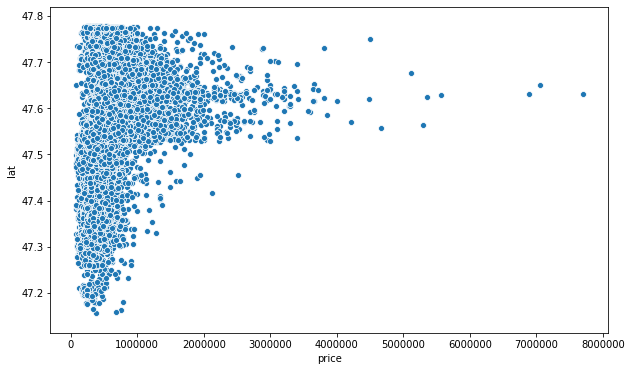

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df) # latitude

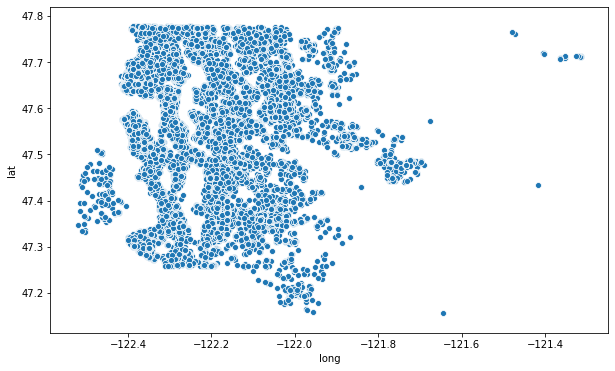

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df) # latitude

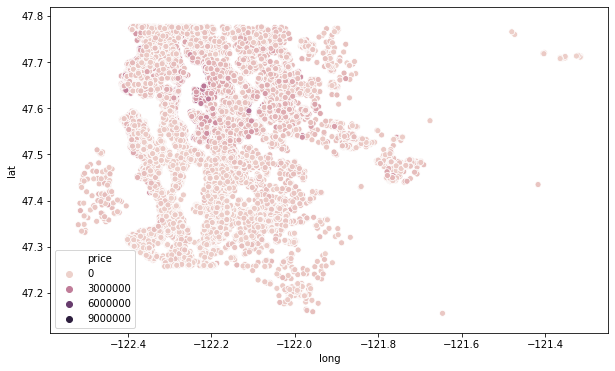

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price') # latitude

##### lets explore the top 20 houses

In [76]:
df.sort_values('price',ascending=False).head(20) # the most expensive house is the 7.7 million dollars

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


##### LEts sample the top 1% houses

In [77]:
len(df) # meaning total 21 k houses in the data frame.

21597

###### Now the 1 percent of this is

In [78]:
len(df)*0.01 # = to 215 houses

215.97

##### Lets create another data frame which is bottom 99%.
So all I am doing here is grabbing the 99 % bottom houses. SO I am not dropping that much information.I am only dropping 1%  information. But hopefuly that drops all those really expensive outlier houses. The reason for that is I can get the more cler color distribution

In [79]:
df.sort_values('price',ascending=False).iloc[216:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [80]:
non_top_perc= df.sort_values('price',ascending=False).iloc[216:]

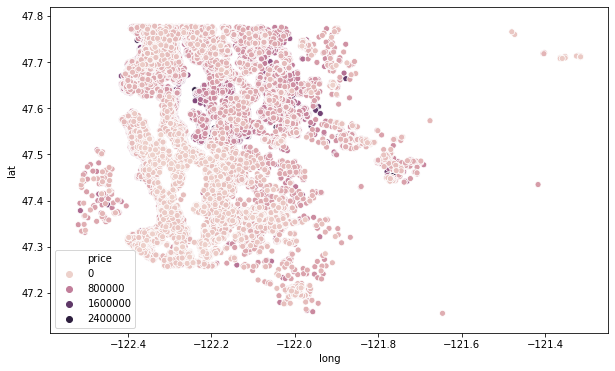

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_top_perc,hue='price') 

In [ ]:
# Now the color distributon is clear

In [ ]:
# To remove the edge color`

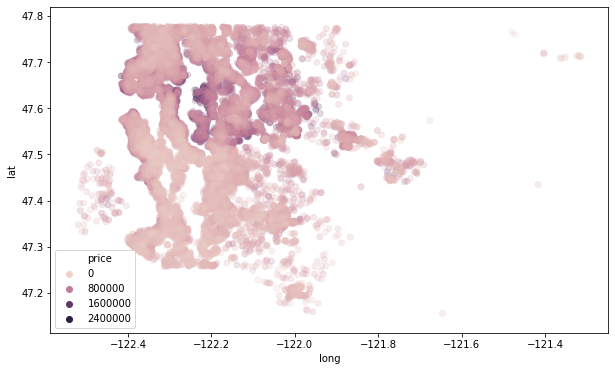

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_top_perc,
                edgecolor=None,alpha=0.2,hue='price') 

In [ ]:
# Now showing where the king county is 

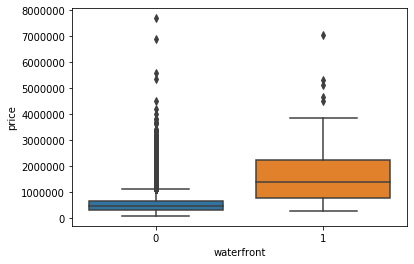

In [83]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data¶

In [84]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [146]:
# Lets drop the id column as it doesnot have meaningful values

In [86]:
df=df.drop('id',axis=1) # will drop the id column

In [87]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


###### lets check the date column

In [88]:
df['date'] #it looks like some kinf=d of starnge

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

##### The date looks like something starnge, so we will convert it in to a date time object by doing the following. The sting will be convert  automatically in to date time object and once its a date time object that means I can extract informatin such  as the month and year automatically.

In [89]:
df['date']=pd.to_datetime(df['date'])

In [90]:
df['date'] # the formating is different

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

###### This is a date time object which means I can begin to perform the feature engineering off this date time by itself. And may not be  useful but I can extract the year component and the month component and the way I can do that is through a couple of simple calls I can say the df year is equal to the   

In [91]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [92]:
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


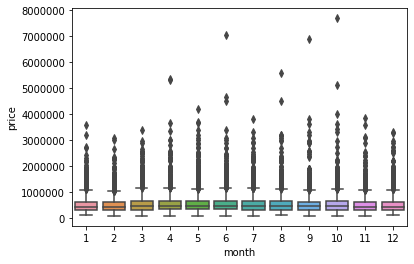

In [93]:
sns.boxplot(x='month',y='price',data=df)

###### It will be hard to tell from this plot unless there are some significant distributions

In [94]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

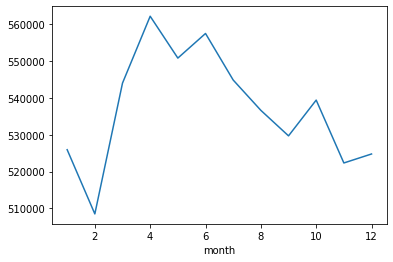

In [95]:
df.groupby('month').mean()['price'].plot()

In [ ]:
# We can do samething for the year

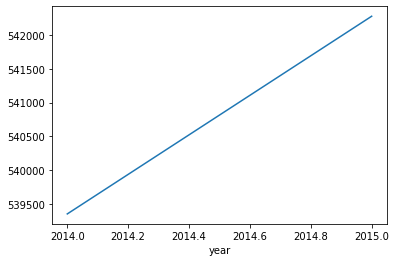

In [96]:
df.groupby('year').mean()['price'].plot()

##### The price increased as the time go on

#### We will drop out our day column

In [97]:
df=df.drop('date',axis=1)

In [98]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [99]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


##### Something we need to the the Zip code. something that is continuus feature that somehow Zip code 98178 is greater than 98125 and this may or maynot be the case that pending how the zip code are actually mapped out on areal map. SO this is where a domain experience come  in to play.

In [100]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

###### There are total of 70 zip codes which is too much. we can drop this column for now

In [101]:
df=df.drop('zipcode',axis=1)

In [102]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

###### Most values are 0 above the 2014 which means non renovated.
One issue is that 0 is not the year but an indication that the house is not renovated.So it may make more sense to categorize this as renovated or not renovated. Essentially, turn all these years using a custom dot apply frunction in to a kind of positive renovated call and keep zero as just not renovated so we could do that through an apply function. However we can take advantage of the situation by thinking in the following fashion.

 Notice that it is most likely the more recent year of renovation the higher the value of the year renovated than  the more likely that the House is going have a higher sell price. More recent renovation is better.

In [103]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

##### Scaling and Train Test Split

### Keras Regrassion Code Along -Part2 

##### After finish our features engeneering the  next step is to separate our features from our label

In [104]:
X = df.drop('price',axis=1).values
y=df['price'].values 
# the .values returns the numpy array underneath the actual data frames

###### Now that we have separated our features from our label. Now it is time to do a train test.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

##### Now it is the time to scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()

In [109]:
X_train= scaler.fit_transform(X_train)

In [110]:
X_test = scaler.transform(X_test)

In [111]:
X_train.shape

(15117, 19)

In [112]:
X_test.shape

(6480, 19)

###### Creating a Model

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

##### There are 19 incoming features in the data that is probably the good range to have 19 neurons

In [114]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse') # last final layer has 1 neuron

###### Training the Model

In [115]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
# the batch size is in the power of 2. The smaller the batch size
# the lonsger training is going to take

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 41us/sample - loss: 430237795035.5737 - val_loss: 418907777423.4865
Epoch 2/400
15117/15117 [==============================] - 0s 19us/sample - loss: 429263766500.0240 - val_loss: 415634802541.3531
Epoch 3/400
15117/15117 [==============================] - 0s 19us/sample - loss: 416550230019.3869 - val_loss: 386885158239.4469
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 355128137093.0211 - val_loss: 286000017054.0247
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 219087813630.7130 - val_loss: 139968885231.5654
Epoch 6/400
15117/15117 [==============================] - 0s 20us/sample - loss: 113995806410.1650 - val_loss: 96043713725.6296
Epoch 7/400
15117/15117 [==============================] - 0s 19us/sample - loss: 98171698694.4013 - val_loss: 94086796346.1531
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 18us/sample - loss: 37724567659.0265 - val_loss: 36439793962.3506
Epoch 65/400
15117/15117 [==============================] - 0s 17us/sample - loss: 37509855806.6918 - val_loss: 36254273778.7259
Epoch 66/400
15117/15117 [==============================] - 0s 20us/sample - loss: 37321919351.5073 - val_loss: 36071673936.9086
Epoch 67/400
15117/15117 [==============================] - 0s 18us/sample - loss: 37155913479.9423 - val_loss: 35902317626.1531
Epoch 68/400
15117/15117 [==============================] - 0s 17us/sample - loss: 36991136906.4571 - val_loss: 35752717486.4593
Epoch 69/400
15117/15117 [==============================] - 0s 16us/sample - loss: 36861777164.4469 - val_loss: 35620790469.2148
Epoch 70/400
15117/15117 [==============================] - 0s 18us/sample - loss: 36688243899.6351 - val_loss: 35465986614.3605
Epoch 71/400
15117/15117 [==============================] - 0s 18us/sample - loss: 36587266592.6160 - val_loss

15117/15117 [==============================] - 0s 19us/sample - loss: 33522033380.7861 - val_loss: 32357093618.7259
Epoch 128/400
15117/15117 [==============================] - 0s 19us/sample - loss: 33502189979.3070 - val_loss: 32230049048.6519
Epoch 129/400
15117/15117 [==============================] - 0s 17us/sample - loss: 33440333078.2012 - val_loss: 32173334265.0469
Epoch 130/400
15117/15117 [==============================] - 0s 18us/sample - loss: 33370420652.5803 - val_loss: 32196190794.5877
Epoch 131/400
15117/15117 [==============================] - 0s 18us/sample - loss: 33367495657.1722 - val_loss: 32223649003.1407
Epoch 132/400
15117/15117 [==============================] - 0s 18us/sample - loss: 33373523759.3660 - val_loss: 32158497127.0321
Epoch 133/400
15117/15117 [==============================] - 0s 19us/sample - loss: 33319428069.5143 - val_loss: 32026718005.7284
Epoch 134/400
15117/15117 [==============================] - 0s 18us/sample - loss: 33268741934.7564 - v

15117/15117 [==============================] - 0s 18us/sample - loss: 31868856510.0737 - val_loss: 30361361693.7086
Epoch 191/400
15117/15117 [==============================] - 0s 18us/sample - loss: 31855682107.7113 - val_loss: 30413942187.2988
Epoch 192/400
15117/15117 [==============================] - 0s 18us/sample - loss: 31850089395.7605 - val_loss: 30286137442.6074
Epoch 193/400
15117/15117 [==============================] - 0s 19us/sample - loss: 31815951523.5880 - val_loss: 30273030710.3605
Epoch 194/400
15117/15117 [==============================] - 0s 18us/sample - loss: 31790225801.4580 - val_loss: 30223756083.2000
Epoch 195/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31766710699.4287 - val_loss: 30207136502.5185
Epoch 196/400
15117/15117 [==============================] - 0s 21us/sample - loss: 31770834145.9073 - val_loss: 30202745191.0321
Epoch 197/400
15117/15117 [==============================] - 0s 19us/sample - loss: 31687823103.6782 - v

15117/15117 [==============================] - 0s 20us/sample - loss: 30805265047.1580 - val_loss: 29242177096.0593
Epoch 254/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30861227265.0669 - val_loss: 29015404801.8963
Epoch 255/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30814199879.5317 - val_loss: 29043018734.3012
Epoch 256/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30773396227.0990 - val_loss: 28982127825.8568
Epoch 257/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30777380836.9047 - val_loss: 29013250594.1333
Epoch 258/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30750335841.5601 - val_loss: 28947809431.7037
Epoch 259/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30766072183.2702 - val_loss: 28953497713.7778
Epoch 260/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30773177976.6081 - v

15117/15117 [==============================] - 0s 17us/sample - loss: 30033637303.7232 - val_loss: 28368912277.8074
Epoch 317/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30115156005.1206 - val_loss: 28157738952.3753
Epoch 318/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30035705568.3154 - val_loss: 28176121785.2049
Epoch 319/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30086818604.5887 - val_loss: 28184227030.9136
Epoch 320/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30022990136.1381 - val_loss: 28120402375.1111
Epoch 321/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30021276087.0797 - val_loss: 28093662033.5407
Epoch 322/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29981359730.7826 - val_loss: 28086177190.2420
Epoch 323/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29976438474.7069 - v

15117/15117 [==============================] - 0s 19us/sample - loss: 29439268950.7050 - val_loss: 27361668735.6840
Epoch 380/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29404732288.4488 - val_loss: 27401603691.4568
Epoch 381/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29580115734.3028 - val_loss: 27376565392.1185
Epoch 382/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29399052345.5776 - val_loss: 27412749076.8593
Epoch 383/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29360467325.7731 - val_loss: 27295676279.4667
Epoch 384/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29349968412.8227 - val_loss: 27299923578.6272
Epoch 385/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29406439193.5543 - val_loss: 27338952104.7704
Epoch 386/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29337020972.4025 - v

## Kerac Regression Part 3

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

###### There is no overfitting can be seen in the data

###### Now lets do some evaluation on our test data. We can do the variety of mathode on this.

### Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

###### Predicting on Brand New Data

In [ ]:
X_test

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
explained_variance_score(y_test,predictions)

In [117]:
df['price'].mean()

540296.5735055795

In [118]:
df['price'].median()

450000.0

In [119]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

NameError: name 'predictions' is not defined

##### Towards right sideof the graph, red line doesn't passes through
the blue points that means, the model is not very good for the houses with higher price. On the other hand the red line passes through the center of the lower price houses that means the odel works well for the house with the lower price.It may be worth to train the model again, just train the bottom 99% houses. Masy be when the price comes above 3 million dollars , we can say that the model is not good enough for this.

In [203]:
#errors = y_test.values.reshape(6480, 1) - predictions

In [204]:
#sns.distplot(errors)

In [ ]:
##### Predicting on a brand new house. How you would use your model to predict on a brand new model. Lets take a look at the original dataframe. Go ahead and the pick the vary first house here.

In [120]:
single_house = df.drop('price',axis=1).iloc[0]

In [121]:
single_house

#The following are the only features on the new house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

##### The next step is to scale this single house data. Recall that our model is trained on the scaled version of the features which means we can actually pass these features raw and in stead we ned to do this say single house grab those values.

In [123]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
# the - 1 means keep that old dimension along that axis
# Now every thing in ths scaled version of everything and now we will reset this to be our single house.

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [124]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [125]:
model.predict(single_house)

array([[282430.9]], dtype=float32)

In [126]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


###### It sold that was 221 K and am predicting it will sell a 288k . This means we are overshooting and again that may be an issue when we are trying to fit these extreme values.

In [127]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

###### In this part the following two things will be focused 
1. how to perform a classification task withthe tessor flow and 
2.The second is how to identify and deal with over fitting through early stopping call back.
techniques as well as  adding in dropout layers early stopping is something we can do if cares to automatically
stop training based on the lsot condition on the validation dat that we 
we passing in during the model that based on the lost condition on the validation data
 tha we pass in during the model that call dropout layers are the layers that we can added to turn off neurons during training to preveent
overfitting

##### Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

In [129]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [131]:
df.describe()
# can see the statistical distribution the various features?

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


###### To make it easy to read will do the transpose of the data

In [132]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


###### lets do the little bit of expolatory data analysis throgh visualization for classification. For the classification task it is always a good idea to do a count plotof your actual label to see the number of instancer per label and se its a well balenced problem or not.

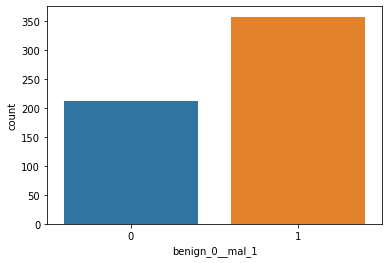

In [133]:
sns.countplot(x='benign_0__mal_1',data=df)

###### From the above plot the difference is not extreme here. Then waht else we can do is the check the correlation between the features them selves.

In [134]:
df.corr()['benign_0__mal_1'].sort_values()
#we can see which is highly correlated and which is highly
#negatively correlated.

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

###### Sometimes it is easier to plot it out.

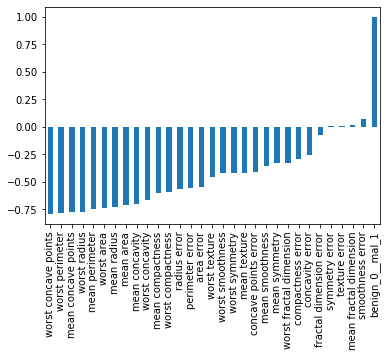

In [135]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

###### The last label is perfectly correlated to 1. SO lets go ahed and drop that 1

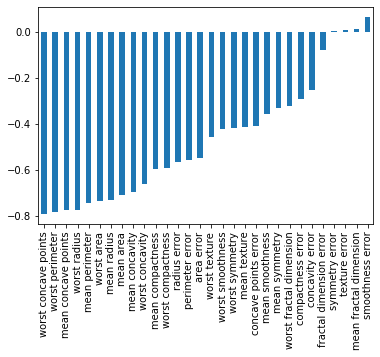

In [136]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

###### It looks like we have highly  ively correlated values, so we should be
able to get the preety strong prediction from this data set  just be=ased of this analysis

###### We can also do a similar analysis of correlation between the actual variables theselves by calling sns heat map 

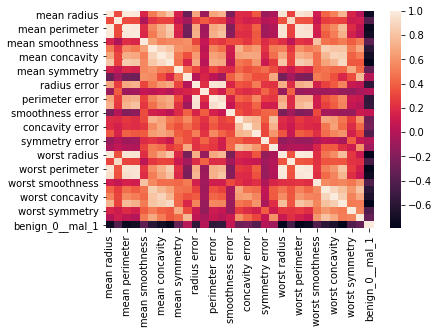

In [137]:
sns.heatmap(df.corr())

###### The above correlation shows the correlation with every feature compared to every other feature

###### Right now we will go ahead and put the expolatory data analysis, so we can get our train test split

In [138]:
X =df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1'].values

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

##### We get our split and then finally lets scale the data

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [143]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [144]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### In the next we are going to create a model and then showing how to prevent over fitting and how to make sure yo don't actually overrun on the training data det and then end up having a poor fit on the test data.

## Keras ClassificationCOde Along Part 2

#### Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

###### Now lets cereate a simple model given that we know so far about creating the models

In [146]:
X_train.shape

(426, 30)

#### This means in the currecnt data set we have 426 rows and 30 features. Therefore I will create a sequential model and then I will add in first layer of 30 neurons

In [147]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-
#of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# the above lines are the  same one line not two lines
model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

#### We created the model and now it is time to train the model

In [148]:
#https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-num
#ber-of-iterations-to-train-a-neural-network    #this line is the remaining part of the above line
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

W1011 23:02:14.274816 140144463685440 deprecation.py:323] From /home/bishnu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 889us/sample - loss: 0.7044 - val_loss: 0.6877
Epoch 2/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6755 - val_loss: 0.6630
Epoch 3/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6490 - val_loss: 0.6375
Epoch 4/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6200 - val_loss: 0.5998
Epoch 5/600
426/426 [==============================] - 0s 98us/sample - loss: 0.5798 - val_loss: 0.5576
Epoch 6/600
426/426 [==============================] - 0s 88us/sample - loss: 0.5362 - val_loss: 0.5126
Epoch 7/600
426/426 [==============================] - 0s 87us/sample - loss: 0.4896 - val_loss: 0.4608
Epoch 8/600
426/426 [==============================] - 0s 71us/sample - loss: 0.4402 - val_loss: 0.4127
Epoch 9/600
426/426 [==============================] - 0s 100us/sample - loss: 0.3929 - val_loss: 0.3644
Epoch 10/600
42

426/426 [==============================] - 0s 70us/sample - loss: 0.0516 - val_loss: 0.1223
Epoch 79/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0557 - val_loss: 0.1074
Epoch 80/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0536 - val_loss: 0.1179
Epoch 81/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0536 - val_loss: 0.1117
Epoch 82/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0517 - val_loss: 0.1124
Epoch 83/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0521 - val_loss: 0.1093
Epoch 84/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0511 - val_loss: 0.1202
Epoch 85/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0512 - val_loss: 0.1094
Epoch 86/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0539 - val_loss: 0.1140
Epoch 87/600
426/426 [==============================] - 0s 80us/samp

426/426 [==============================] - 0s 70us/sample - loss: 0.0402 - val_loss: 0.1279
Epoch 156/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0421 - val_loss: 0.1353
Epoch 157/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0416 - val_loss: 0.1375
Epoch 158/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0411 - val_loss: 0.1371
Epoch 159/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0406 - val_loss: 0.1229
Epoch 160/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0399 - val_loss: 0.1304
Epoch 161/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0410 - val_loss: 0.1379
Epoch 162/600
426/426 [==============================] - 0s 83us/sample - loss: 0.0396 - val_loss: 0.1400
Epoch 163/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0398 - val_loss: 0.1316
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 70us/sample - loss: 0.0346 - val_loss: 0.1348
Epoch 233/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0320 - val_loss: 0.1544
Epoch 234/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0317 - val_loss: 0.1395
Epoch 235/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0346 - val_loss: 0.1633
Epoch 236/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0375 - val_loss: 0.1274
Epoch 237/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0342 - val_loss: 0.1500
Epoch 238/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0318 - val_loss: 0.1368
Epoch 239/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0336 - val_loss: 0.1529
Epoch 240/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0307 - val_loss: 0.1431
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 81us/sample - loss: 0.0285 - val_loss: 0.1658
Epoch 310/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0286 - val_loss: 0.1473
Epoch 311/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0280 - val_loss: 0.1691
Epoch 312/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0446 - val_loss: 0.1292
Epoch 313/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0468 - val_loss: 0.2373
Epoch 314/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0429 - val_loss: 0.1357
Epoch 315/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0303 - val_loss: 0.1705
Epoch 316/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0268 - val_loss: 0.1427
Epoch 317/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0254 - val_loss: 0.1568
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 119us/sample - loss: 0.0222 - val_loss: 0.1878
Epoch 387/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0200 - val_loss: 0.1745
Epoch 388/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0202 - val_loss: 0.1931
Epoch 389/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0230 - val_loss: 0.1548
Epoch 390/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0229 - val_loss: 0.1633
Epoch 391/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0222 - val_loss: 0.1914
Epoch 392/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0252 - val_loss: 0.1791
Epoch 393/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0229 - val_loss: 0.1625
Epoch 394/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0209 - val_loss: 0.1690
Epoch 395/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 79us/sample - loss: 0.0215 - val_loss: 0.2440
Epoch 464/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0197 - val_loss: 0.1700
Epoch 465/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0163 - val_loss: 0.1877
Epoch 466/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0142 - val_loss: 0.2032
Epoch 467/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0142 - val_loss: 0.1913
Epoch 468/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0156 - val_loss: 0.2088
Epoch 469/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0146 - val_loss: 0.2011
Epoch 470/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0143 - val_loss: 0.2012
Epoch 471/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0140 - val_loss: 0.2011
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 71us/sample - loss: 0.0137 - val_loss: 0.1831
Epoch 541/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0137 - val_loss: 0.1906
Epoch 542/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0106 - val_loss: 0.2373
Epoch 543/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0114 - val_loss: 0.1992
Epoch 544/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0117 - val_loss: 0.2078
Epoch 545/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0114 - val_loss: 0.2029
Epoch 546/600
426/426 [==============================] - 0s 81us/sample - loss: 0.0108 - val_loss: 0.2060
Epoch 547/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0103 - val_loss: 0.1948
Epoch 548/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0099 - val_loss: 0.2164
Epoch 549/600
426/426 [==============================] - 0s 

###### This isjust finished the training for the six hundred epochs  and the next is plot the loss and remember that you passed in our validation data during the training. So we will be able to plot out both the training loss and the validation loss.

In [150]:
loses = pd.DataFrame(model.history.history)

In [151]:
loses # the two loses are the training loss and the validation loss

,loss,val_loss
0,0.704354,0.687693
1,0.675542,0.662990
2,0.648991,0.637462
3,0.620003,0.599844
4,0.579774,0.557579
...,...,...
595,0.007702,0.229645
596,0.008791,0.234592
597,0.008073,0.219916
598,0.007772,0.219075


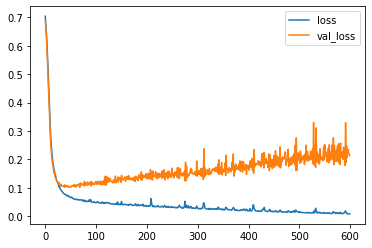

In [152]:
loses.plot()

###### At the beginning both of the loses are decreasing  however, at some points, the blue line still decreasing but validation loss is increasing. That basically tells us that we are over fitting to our training dataset. so we have a clear indication here tha t we are training just for toomany epoch. Noticed that the validation loss get worse and worse after these epoch

#### So what we are going to do is to see if we can use the early stopping. So obviously we trained too much. And we are going to do is show you how to use the tensor flow cares callbacks to actually based on your validation loss stop the training before it gets out of the hand as shown here..

###### We don't want to keep training on the same model.

In [153]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

##### Basically we have to choose a metric to monitor in our case it will be validation loss the orange metric in the above histogram. So we are going to be tracking that validation loss and you can specify things like the minimum changed, required also there is patients which is the number of epoch with no improvements after which training will be stop.

##### Lets see how to use the early stopping

In [156]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# patience = 25 means we will wait 25 epoch even after we have
# kind of detected a stopping point because noise that could occur

In [157]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 624us/sample - loss: 0.6764 - val_loss: 0.6390
Epoch 2/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6209 - val_loss: 0.5954
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5762 - val_loss: 0.5500
Epoch 4/600
426/426 [==============================] - 0s 97us/sample - loss: 0.5294 - val_loss: 0.4985
Epoch 5/600
426/426 [==============================] - 0s 79us/sample - loss: 0.4772 - val_loss: 0.4451
Epoch 6/600
426/426 [==============================] - 0s 77us/sample - loss: 0.4251 - val_loss: 0.3970
Epoch 7/600
426/426 [==============================] - 0s 95us/sample - loss: 0.3821 - val_loss: 0.3523
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.3433 - val_loss: 0.3148
Epoch 9/600
426/426 [==============================] - 0s 91us/sample - loss: 0.3098 - val_loss: 0.2838
Epoch 10/600
426/

426/426 [==============================] - 0s 91us/sample - loss: 0.0484 - val_loss: 0.1005
Epoch 79/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0488 - val_loss: 0.0995
Epoch 80/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0479 - val_loss: 0.1029
Epoch 81/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0474 - val_loss: 0.1002
Epoch 82/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0477 - val_loss: 0.1047
Epoch 83/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0473 - val_loss: 0.1021
Epoch 84/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0472 - val_loss: 0.1024
Epoch 85/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0464 - val_loss: 0.1008
Epoch 86/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0476 - val_loss: 0.1005
Epoch 87/600
426/426 [==============================] - 0s 48us/s

426/426 [==============================] - 0s 71us/sample - loss: 0.0349 - val_loss: 0.0937
Epoch 156/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0334 - val_loss: 0.0869
Epoch 157/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0316 - val_loss: 0.0899
Epoch 158/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0310 - val_loss: 0.0845
Epoch 159/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0315 - val_loss: 0.0946
Epoch 160/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0327 - val_loss: 0.0886
Epoch 161/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0309 - val_loss: 0.0880
Epoch 162/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0314 - val_loss: 0.0902
Epoch 163/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0317 - val_loss: 0.0914
Epoch 164/600
426/426 [==============================] - 0

##### Now lets check out the model loss

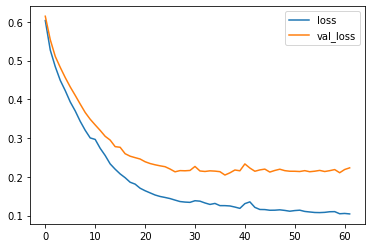

In [252]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

###### The third thing we can do to stop the overfitting is add in dropout layers. The dropout layers will essentially turn off   a percentage on neurons ramdomly.

### Example Three: Adding in DropOut Layers

In [158]:
from tensorflow.keras.layers import Dropout

In [159]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
# 0.5 means 50 % of the neurons are turned off randomly
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [160]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6921 - val_loss: 0.6660
Epoch 2/600
426/426 [==============================] - 0s 81us/sample - loss: 0.6780 - val_loss: 0.6547
Epoch 3/600
426/426 [==============================] - 0s 144us/sample - loss: 0.6529 - val_loss: 0.6384
Epoch 4/600
426/426 [==============================] - 0s 90us/sample - loss: 0.6383 - val_loss: 0.6145
Epoch 5/600
426/426 [==============================] - 0s 88us/sample - loss: 0.6265 - val_loss: 0.5935
Epoch 6/600
426/426 [==============================] - 0s 100us/sample - loss: 0.6211 - val_loss: 0.5729
Epoch 7/600
426/426 [==============================] - 0s 90us/sample - loss: 0.5797 - val_loss: 0.5476
Epoch 8/600
426/426 [==============================] - 0s 101us/sample - loss: 0.5789 - val_loss: 0.5216
Epoch 9/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5719 - val_loss: 0.4930
Epoch 10/600
426

426/426 [==============================] - 0s 78us/sample - loss: 0.1199 - val_loss: 0.0988
Epoch 79/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1270 - val_loss: 0.1047
Epoch 80/600
426/426 [==============================] - 0s 76us/sample - loss: 0.1162 - val_loss: 0.1052
Epoch 81/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1263 - val_loss: 0.0908
Epoch 82/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1142 - val_loss: 0.1075
Epoch 83/600
426/426 [==============================] - 0s 92us/sample - loss: 0.1038 - val_loss: 0.0957
Epoch 84/600
426/426 [==============================] - 0s 93us/sample - loss: 0.1120 - val_loss: 0.0908
Epoch 85/600
426/426 [==============================] - 0s 92us/sample - loss: 0.1150 - val_loss: 0.0906
Epoch 86/600
426/426 [==============================] - 0s 88us/sample - loss: 0.1130 - val_loss: 0.1039
Epoch 87/600
426/426 [==============================] - 0s 90us/samp

###### Lets go ahead and analyze now these loses here

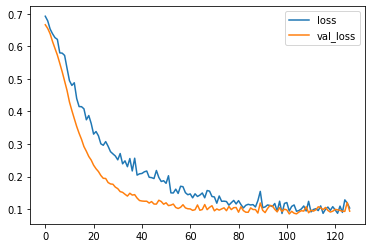

In [161]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

###### Lets do the full evaluation on our classes.

### Model Evaluation

In [162]:
predictions = model.predict_classes(X_test)

In [163]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [166]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [167]:
import pandas as pd

In [168]:
data_info = pd.read_csv('./DATA/lending_club_info.csv',index_col='LoanStatNew')

In [169]:
data_info.head(2)


,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...


In [170]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [282]:
#print(data_info.loc['revol_util']['Description'])

In [171]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [172]:
feat_info(['mort_acc'])

LoanStatNew
mort_acc    Number of mortgage accounts.
Name: Description, dtype: object


## Loading the data and other imports

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [174]:
df = pd.read_csv('./DATA/lending_club_loan_two.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#### Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

In [176]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

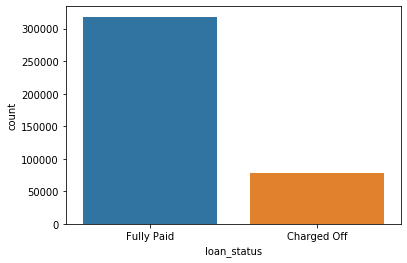

In [177]:
sns.countplot(x='loan_status',data=df)

### TASK: Create a histogram for a loan amount

(0, 45000)

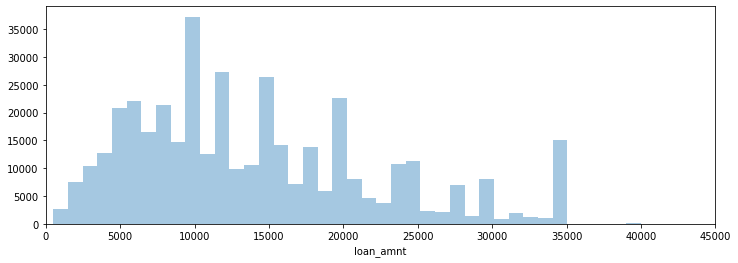

In [178]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

### **TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [326]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### **TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

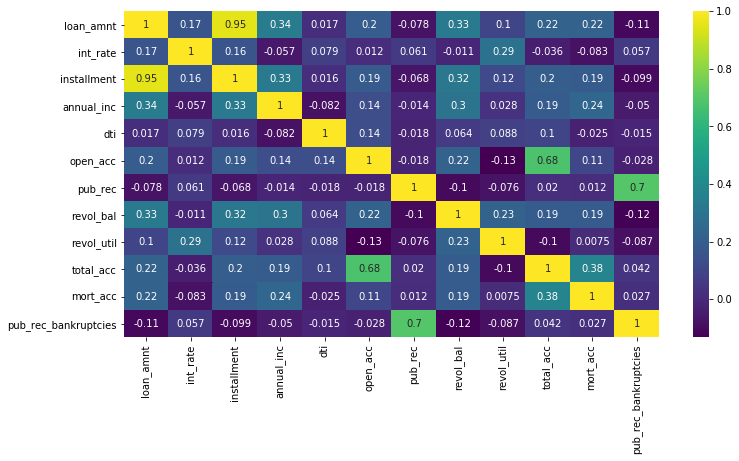

In [180]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### **TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [182]:
feat_info('installment') 

The monthly payment owed by the borrower if the loan originates.


In [183]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


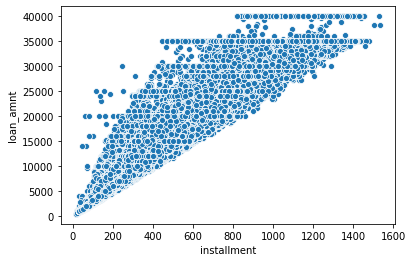

In [184]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

#### **TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

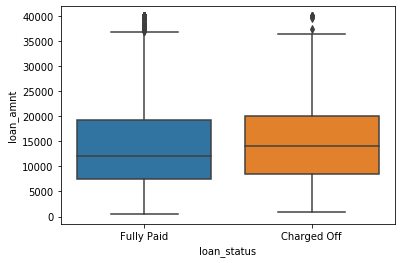

In [185]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

### **TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [186]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### **TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [187]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [188]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

#### **TASK: Create a countplot per grade. Set the hue to the loan_status label.**

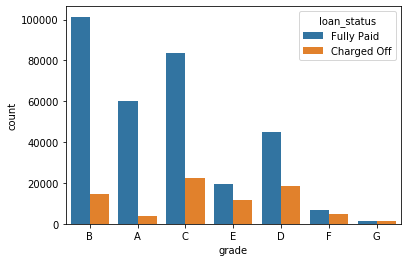

In [189]:
sns.countplot(x= 'grade',hue='loan_status',data=df)

#### **TASK: Display a count plot per subgrade. You may need to resize for this plot and reorder the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status**

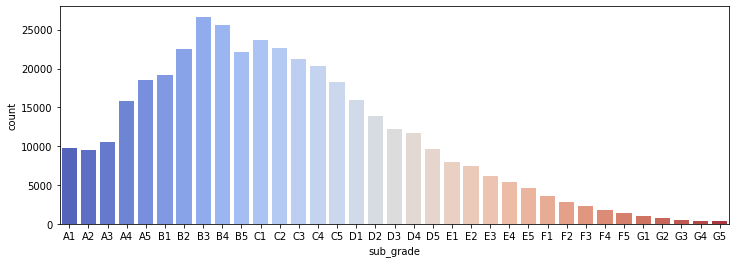

In [190]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

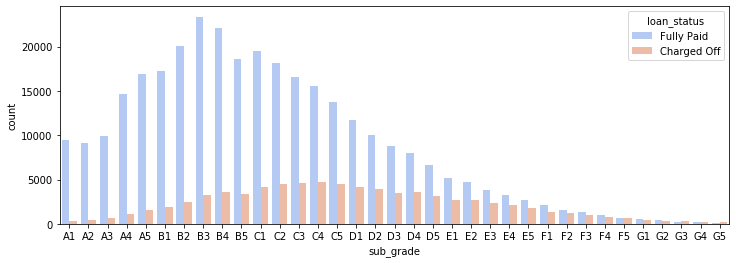

In [191]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

### **TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

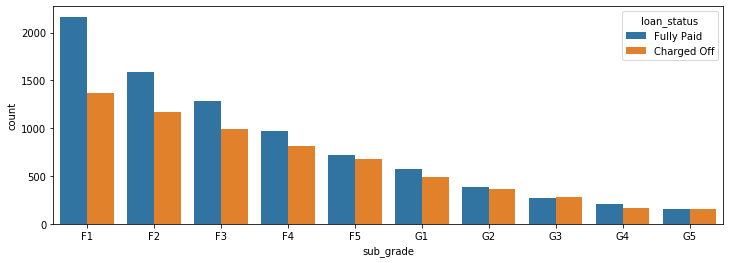

In [192]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

##### **TASK: Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [193]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [194]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [195]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


#### **CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

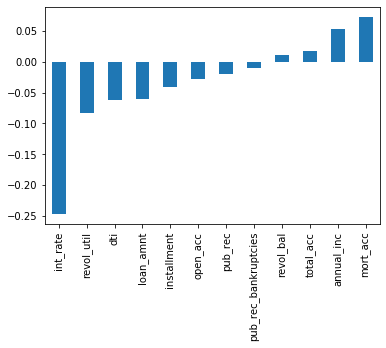

In [196]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [197]:
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [198]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [199]:
df.isnull().sum()#looks like emp_title  hasmissing data of 22927

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [200]:
100*df.isnull().sum()/len(df)# it will be better to have the missing data
# in terms of percentage

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [201]:
feat_info('emp_title')
print("\n")
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [202]:
df['emp_title'].nunique()

173105

In [203]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
1C451                               1
Materials & Dist Associate IV       1
Reconsideration Specialist          1
Bombard electric                    1
SAW                                 1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [204]:
df=df.drop('emp_title',axis=1)

In [205]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [206]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [208]:
emp_length_order = ['< 1 year','1 year','2 years','3 years'
                   ,'4 years','5 years','6 years','7 years'
                   ,'8 years','9 years','10+ years']

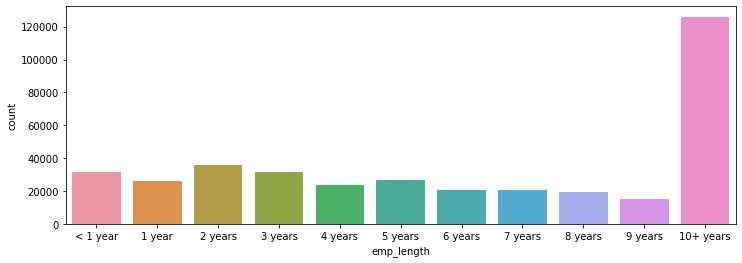

In [209]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df, order=emp_length_order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

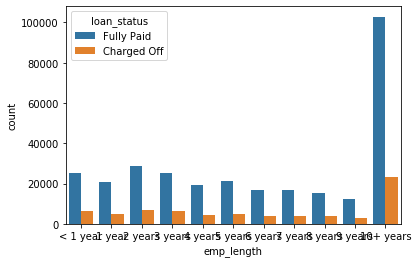

In [210]:
sns.countplot(x='emp_length',data=df,hue='loan_status',order=emp_length_order)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [211]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [212]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [213]:
emp_len = emp_co/emp_fp

In [214]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

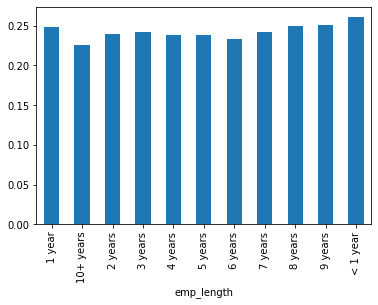

In [215]:
emp_len.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [216]:
df=df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [217]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

# Keras Project solutions  categorical data --> -->

In [218]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [219]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [220]:
feat_info('title')

The loan title provided by the borrower


In [221]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [222]:
df=df.drop('title',axis=1)

In [223]:
feat_info('mort_acc')

Number of mortgage accounts.


In [224]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [230]:
df.corr()['mort_acc']


loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [232]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [235]:
df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
some part left is left not completed here

In [236]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

# Now lets go through all of the string features to see what we do with them1m1m

### TAsk: convert the term feature into either a 36 or 60 interger numeric data type using .apply() or .map()

In [259]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [260]:
df['term'].value_counts()


36    302005
60     94025
Name: term, dtype: int64

In [261]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

TypeError: 'int' object is not subscriptable

In [262]:
df['term'] # now it is a numeric column

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

# grade feature

### Task: We already know gread is part of sub_grade of , so just drop the grade feature

In [263]:
df = df.drop('grade',axis=1)

KeyError: "['grade'] not found in axis"

### Now convert the subgrade to dummy variable

In [264]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade', axis=1),dummies], axis=1)

KeyError: 'sub_grade'

In [265]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [266]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

## Evluating the Model performance

In [267]:
model.history.history #returens the dictionary of losses

{'loss': [0.69213824372896,
  0.677986870629127,
  0.652896460792828,
  0.6383260566863656,
  0.6265417698403479,
  0.6211472296378981,
  0.5796778267817878,
  0.578887552302768,
  0.5718684311204113,
  0.532457174969391,
  0.49451556675870656,
  0.47983693195060945,
  0.488011896190509,
  0.43963540481849456,
  0.4148803630345304,
  0.414619054033163,
  0.40801552735583885,
  0.37439778461142886,
  0.38741141165925863,
  0.36318738373792225,
  0.3304360293446572,
  0.338383158607662,
  0.3253467553798022,
  0.30070903155725326,
  0.29616211606583126,
  0.3074997587942741,
  0.2932829305599553,
  0.2765684486694739,
  0.2698085515851706,
  0.26327920645615305,
  0.2515304984760956,
  0.2708416962427712,
  0.23930577325149321,
  0.24845002857452267,
  0.2304693362522573,
  0.2554558537235842,
  0.21735562733921088,
  0.2564920131029657,
  0.2046132247212907,
  0.20858947757823926,
  0.2096949456513208,
  0.21475504023928038,
  0.21718324294112656,
  0.19804911378403783,
  0.196909194681

In [268]:
losses = pd.DataFrame(model.history.history)

In [269]:
losses.head() # two losses, loss and validation loss. The is the training loss
#validation loss is the test set

,loss,val_loss
0,0.692138,0.666022
1,0.677987,0.654716
2,0.652896,0.638385
3,0.638326,0.614546
4,0.626542,0.593532


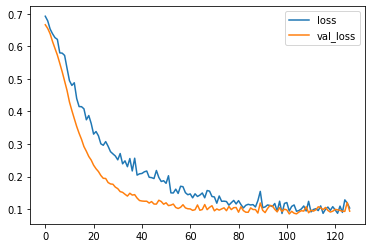

In [270]:
losses.plot()

In [271]:
from sklearn.metrics import classification_report,confusion_matrix

In [272]:
predictions = model.predict_classes(X_test)

In [273]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# Tensorboard

---
---

**NOTE: You must watch the corresponding video to understand this lecture. This notebook can't serve as a full guide. Please watch the video BEFORE posting questions to the QA forum.**

---
---

Let's explore the built in data visualization capabilities that come with Tensorboard.

Full official tutorial available here: https://www.tensorflow.org/tensorboard/get_started

## Data

In [278]:
import pandas as pd
import numpy as np

In [280]:
pwd


'/home/bishnu/python_self/03-Python-for-Data-Analysis-Pandas'

In [281]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [277]:
### Train Test Split